# Plot Setting

In [1]:
import os
import sys
from pathlib import Path

# Set root and data directories
ROOT_DIR = Path(os.getcwd()).resolve().parent.parent
sys.path.append(str(ROOT_DIR))
from path import DATA_DIR
from utils import sample_based_pcc

print("ROOT_DIR:", ROOT_DIR)
print("DATA_DIR:", DATA_DIR)


ROOT_DIR: /root/project/reproducity
DATA_DIR: /data/sequential_data


In [2]:
import pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configure Matplotlib styles

mpl.rcParams.update({
    "axes.labelsize": 7,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.frameon": False,
    "legend.fontsize": 3,
    "axes.linewidth": 0.5,
    "pdf.fonttype": 42,
    "figure.dpi": 300,
})


# Figure 2F

In [3]:

step = 9
window_size = 50
plot_data_path = ROOT_DIR.parent / f"scripts/AlphaTherapy/working_log/ENV_FDA_MCF7_STEP{step}_SEED1/plot_test_data.csv"
data= pd.read_csv(plot_data_path)
plot_len = data.shape[0]-window_size+1
sequential_synergy_rewards = np.zeros([10, plot_len])
efficacy_rewards = np.zeros([10, plot_len])
episode_rewards = np.zeros([10, plot_len])

for seed in range(1, 11):
    plot_data_path = ROOT_DIR.parent / f"scripts/AlphaTherapy/working_log/ENV_FDA_MCF7_STEP{step}_SEED{seed}/plot_test_data.csv"
    data= pd.read_csv(plot_data_path)

    sequential_synergy_rewards[seed-1, :] = np.convolve(data["diff"], np.ones(window_size)/window_size, mode='valid')
    efficacy_rewards[seed-1, :] = np.convolve(data["eff"], np.ones(window_size)/window_size, mode='valid')
    episode_rewards[seed-1, :] = np.convolve(data["reward"], np.ones(window_size)/window_size, mode='valid')

sequential_synergy_rewards_mean = np.mean(sequential_synergy_rewards, axis=0)
sequential_synergy_rewards_std = np.std(sequential_synergy_rewards, axis=0)
efficacy_rewards_mean = np.mean(efficacy_rewards, axis=0)
efficacy_rewards_std = np.std(efficacy_rewards, axis=0)
episode_rewards_mean = np.mean(episode_rewards, axis=0)
episode_rewards_std = np.std(episode_rewards, axis=0)


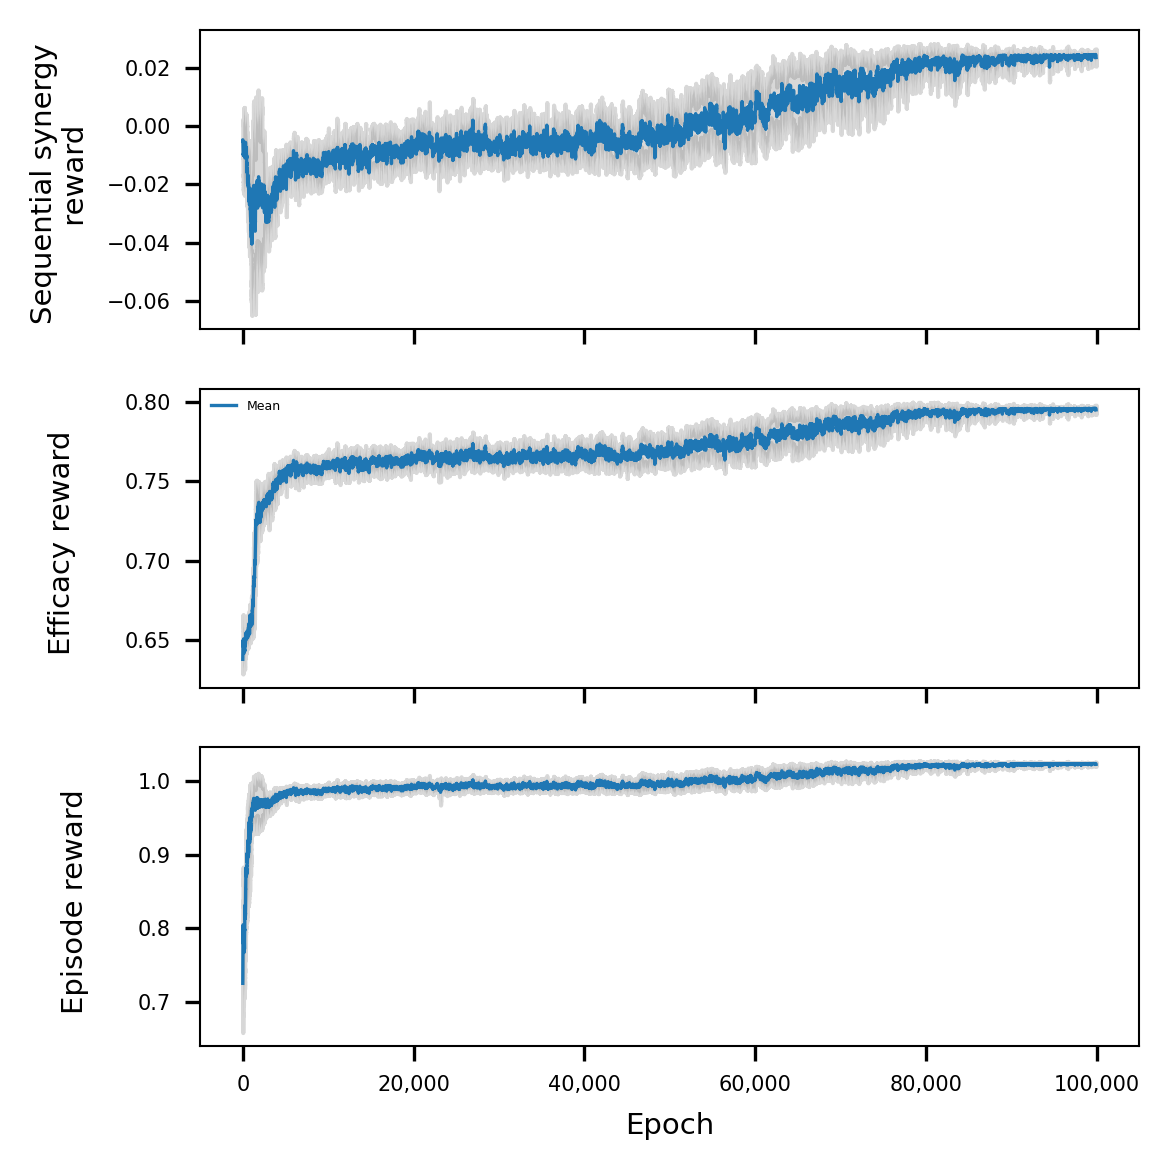

In [4]:
# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 4), sharex=True)

# Define x-axis
x = np.arange(0, sequential_synergy_rewards_mean.shape[0])

# Plot 1: Sequential synergy reward
ax1.plot(sequential_synergy_rewards_mean, linewidth=0.8, label='Mean')
ax1.set_ylabel('Sequential synergy \n reward')
ax1.fill_between(
    x,
    sequential_synergy_rewards_mean - sequential_synergy_rewards_std,
    sequential_synergy_rewards_mean + sequential_synergy_rewards_std,
    color='gray',
    alpha=0.3,
    label='Standard Deviation'
)

# Plot 2: Efficacy reward
ax2.plot(efficacy_rewards_mean, linewidth=0.8, label='Mean')
ax2.set_ylabel('Efficacy reward \n')
ax2.legend(loc="best")
ax2.fill_between(
    x,
    efficacy_rewards_mean - efficacy_rewards_std,
    efficacy_rewards_mean + efficacy_rewards_std,
    color='gray',
    alpha=0.3,
    label='Standard Deviation'
)

# Plot 3: Episode reward
ax3.plot(episode_rewards_mean, linewidth=0.8, label='Mean')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Episode reward \n')
ax3.set_xticks(np.arange(0, 100001, 20000))
ax3.set_xticklabels(['0', '20,000', '40,000', '60,000', '80,000', '100,000'])
ax3.fill_between(
    x,
    episode_rewards_mean - episode_rewards_std,
    episode_rewards_mean + episode_rewards_std,
    color='gray',
    alpha=0.3,
    label='Standard Deviation'
)

fig.tight_layout()
plt.show()

# Save high-quality image (uncomment to use)
# fig.savefig(fig_name, dpi=300, bbox_inches='tight')


# Figure2G

In [5]:
# Load random sequential data
env_name = "ENV_FDA_MCF7_STEP9"
random_data_file = DATA_DIR / f"result_2025/AlphaTherapy/{env_name}_random_sequential_data.csv"
random_data = pd.read_csv(random_data_file)
random_eff_rewards = random_data["Efficacy_reward"].to_numpy()
random_synergy_rewards = random_data["Synergy_reward"].to_numpy()

# Load AlphaTherapy sequential data
AlphaTherapy_data_file = ROOT_DIR.parent / "output/AlphaTherapy/ENV_FDA_MCF7_STEP9.csv"
AlphaTherapy_data = pd.read_csv(AlphaTherapy_data_file, index_col=0)

suggested_synergy_rewards = AlphaTherapy_data["synergy_score"].to_numpy()
suggested_eff_rewards = AlphaTherapy_data["AB_score"].to_numpy()

/tmp/ipykernel_633741/637270364.py:24: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.unique(random_synergy_rewards), fill=True, color="grey", vertical=True, linewidth=0, ax=axes[1, 1])
/tmp/ipykernel_633741/637270364.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=7, frameon=False)


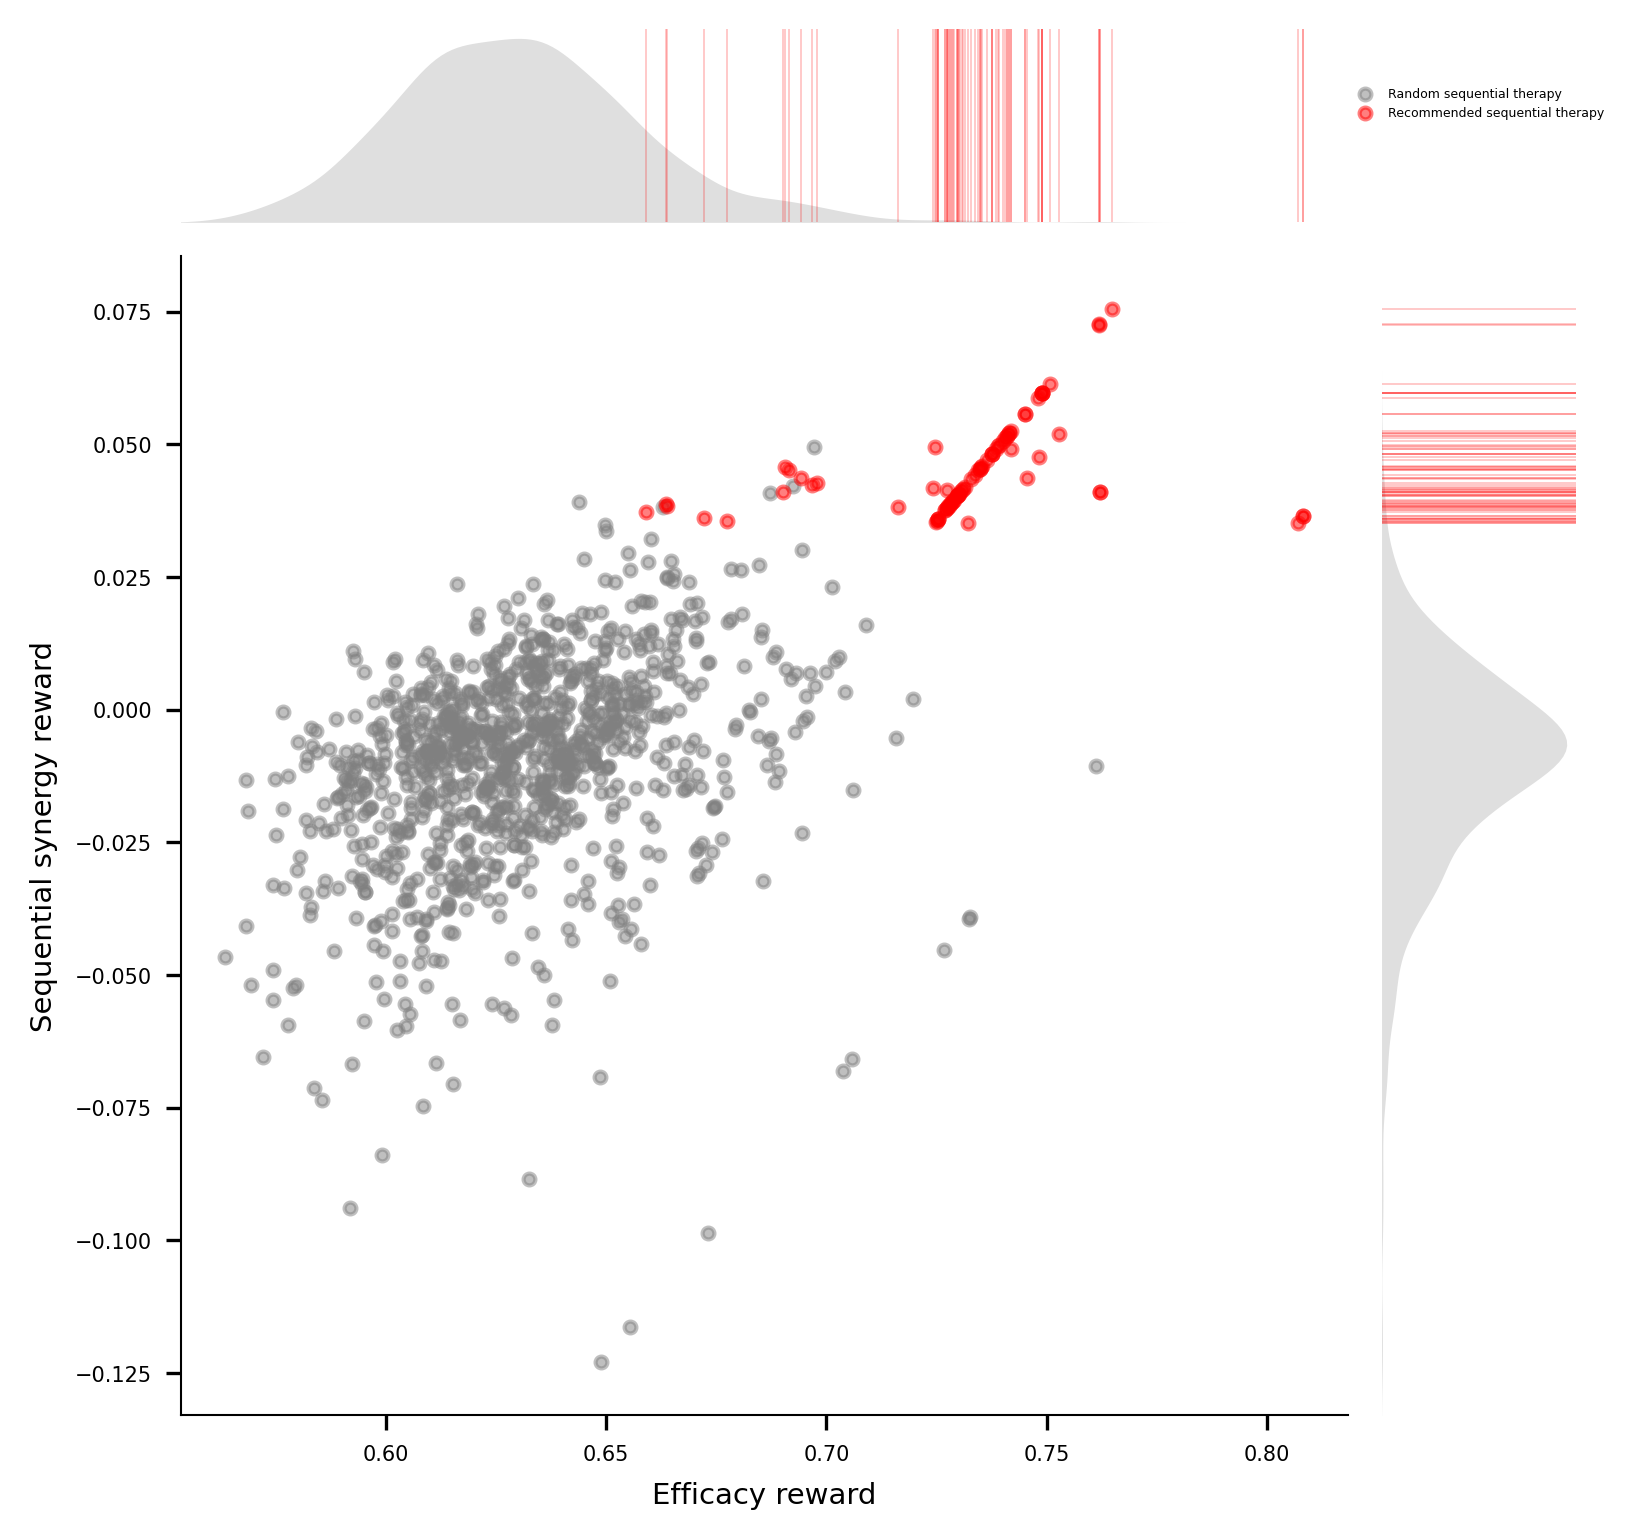

In [6]:
# Create figure and axes objects
fig, axes = plt.subplots(2, 2, figsize=(6, 6), gridspec_kw={'width_ratios': [3, 0.5], 'height_ratios': [0.5, 3]})

# Determine x and y axis limits
x_min = np.min(np.concatenate([np.array(random_eff_rewards), np.array(suggested_eff_rewards)])) - 0.01
x_max = np.max(np.concatenate([np.array(random_eff_rewards), np.array(suggested_eff_rewards)])) + 0.01
y_min = np.min(np.concatenate([np.array(random_synergy_rewards), np.array(suggested_synergy_rewards)])) - 0.01
y_max = np.max(np.concatenate([np.array(random_synergy_rewards), np.array(suggested_synergy_rewards)])) + 0.01

# Plot scatter plot
axes[1, 0].scatter(random_eff_rewards, random_synergy_rewards, c='grey', s=8, alpha=0.5, label='Random sequential therapy')
axes[1, 0].scatter(suggested_eff_rewards, suggested_synergy_rewards, c='r', s=8, alpha=0.5, label='Recommended sequential therapy')
# Hide right and top borders
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False)
# Add labels to the axes
axes[1, 0].set_xlabel('Efficacy reward', fontsize=7)
axes[1, 0].set_ylabel('Sequential synergy reward', fontsize=7)
axes[1, 0].set_xlim([x_min, x_max])
axes[1, 0].set_ylim([y_min, y_max])
axes[1, 0].legend(loc=2, bbox_to_anchor=(1.0, 1.15), borderaxespad=0.)

# Plot vertical KDE for synergy rewards
sns.kdeplot(np.unique(random_synergy_rewards), fill=True, color="grey", vertical=True, linewidth=0, ax=axes[1, 1])
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['left'].set_visible(False)
axes[1, 1].spines['bottom'].set_visible(False)
axes[1, 1].set_ylim([y_min, y_max])
axes[1, 1].get_xaxis().set_visible(False)
axes[1, 1].get_yaxis().set_visible(False)

# Add red horizontal lines for suggested synergy rewards
for y_pos in suggested_synergy_rewards:
    axes[1, 1].axhline(y=y_pos, color='red', linewidth=0.1)

# Plot horizontal KDE for efficacy rewards
sns.kdeplot(np.unique(random_eff_rewards), fill=True, color="grey", linewidth=0, ax=axes[0, 0])
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['left'].set_visible(False)
axes[0, 0].spines['bottom'].set_visible(False)
axes[0, 0].set_xlim([x_min, x_max])
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].get_yaxis().set_visible(False)

# Add red vertical lines for suggested efficacy rewards
for x_pos in suggested_eff_rewards:
    axes[0, 0].axvline(x=x_pos, color='red', linewidth=0.1)

# Format the empty top-right subplot
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['left'].set_visible(False)
axes[0, 1].spines['bottom'].set_visible(False)
axes[0, 1].get_xaxis().set_visible(False)
axes[0, 1].get_yaxis().set_visible(False)

# Display the plot
plt.legend(loc='upper left', fontsize=7, frameon=False)
plt.subplots_adjust(hspace=0.05, wspace=0.05)  # Adjust spacing between subplots
plt.show()

# Save high-quality image
# fig.savefig(fig_name, dpi=300, bbox_inches='tight')


# Figure 2H

In [7]:
# Prepare data
data_path = ROOT_DIR.parent / "output/AlphaTherapy"
# List of file paths for steps from 2 to 9
step_files = [data_path / f"ENV_FDA_MCF7_STEP{i}.csv" for i in range(2, 10)]

# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

for file in step_files:
    # Read data from each file
    df = pd.read_csv(file)
    
    # Extract AB_score and BA_score columns
    extracted_data = df[['AB_score', 'BA_score']].copy()
    
    # Get the step number from the file name
    step = int(file.stem.split("_STEP")[1])
    
    # Add a column for the step information
    extracted_data['step'] = step
    
    # Append data to the combined DataFrame
    combined_df = pd.concat([combined_df, extracted_data], ignore_index=True)

# Convert wide-format data to long-format data for plotting
plot_df = pd.melt(
    combined_df,
    id_vars=["step"],          # Columns to retain
    value_vars=["AB_score", "BA_score"],  # Columns to transform
    var_name="variable",       # New column name indicating the original variable
    value_name="value"         # New column name for the variable values
)

# Rename the 'step' column to 'group' for consistency
plot_df.rename(columns={"step": "group"}, inplace=True)


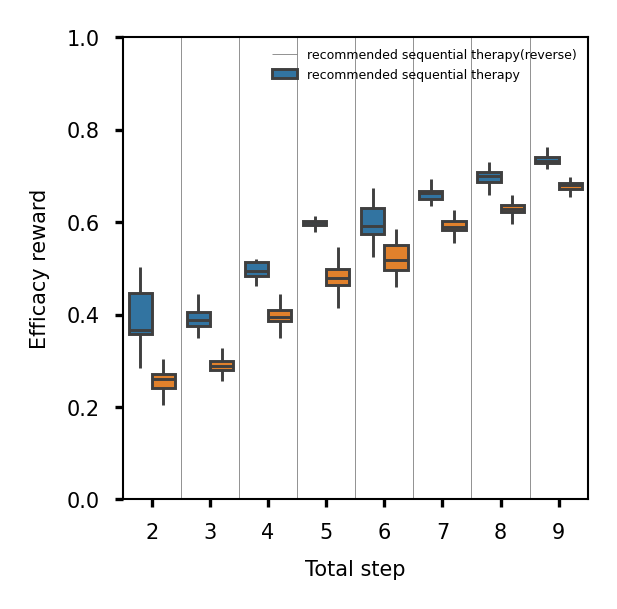

In [8]:
fig,ax =plt.subplots(figsize=(2,2))

ax.vlines(np.arange(0,9)-0.5, -3, 3, colors='grey', linewidth=0.2)
sns.boxplot(x="group", y="value", hue="variable", data=plot_df, ax=ax, width=0.8, fliersize=0, linewidth=0.7, showcaps=False) 

# ax.set_xticks(np.arange(0,10)-0.5)
# ax.set_xticklabels([str(i*10)+"%" for i in np.arange(0,11)])

ax.set_xlabel('Total step', fontsize=5)
ax.set_ylabel('Efficacy reward', fontsize=5)

ax.tick_params(axis='x', direction='out', length=2) 
ax.tick_params(axis='y', direction='out', length=2)  

ax.set_ylim(0, 1)

plt.legend(title="", labels=["recommended sequential therapy(reverse)","recommended sequential therapy"])
plt.show()


# Figure 2I

In [9]:
# prepare data
with open(DATA_DIR / f"result_2025/AlphaTherapy/example_cv_data.pkl", "rb") as f:
    drugAB_cv_ls, drugA_cv_ls, drugB_cv_ls = pickle.load(f)

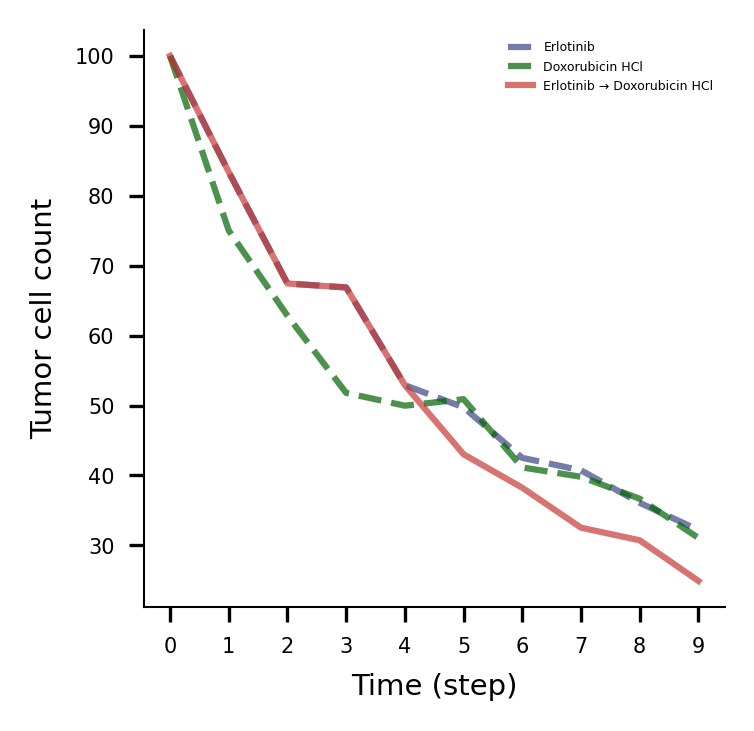

In [10]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))

x = np.arange(len(drugA_cv_ls))
# Plot three curves on the given ax
ax.plot(x, [val * 100 for val in drugA_cv_ls], label='Erlotinib', color='#3A4482', linestyle='--', alpha=0.7)
ax.plot(x, [val * 100 for val in drugB_cv_ls], label='Doxorubicin HCl', color='#006400', linestyle='--', alpha=0.7)
ax.plot(x, [val * 100 for val in drugAB_cv_ls], label='Erlotinib → Doxorubicin HCl', color='#C73834', alpha=0.7)

# Add title and labels
ax.set_title('')
ax.set_xlabel('Time (step)')
ax.set_ylabel('Tumor cell count')

# Set x-axis ticks to range from 0 to 9
plt.xticks(range(10))

# Display legend
ax.legend()

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()
